In [1]:
project_root_path = '/home/matt/Projects/Web3HackerNetwork'

In [2]:
import sys

bob_lib_path = project_root_path + "/sandbox/python/bob/"
sys.path.append(bob_lib_path)
import commit_stat_engineering

In [3]:
# this is the other way to handle imports, if you want the code visible:
# %load /home/bob/projects/Web3HackerNetwork/sandbox/python/bob/commit_stat_engineering.py

In [4]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

In [5]:
first = True
for stat in [stat for stat in all_stats if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0 and stat['jsonFiles'] > 0 and stat['javascriptFiles'] > 0]:
    if first:
        print(json.dumps(stat, indent=2))
        first = False
    else: break

{
  "commit": "1ab71853517cb9f14d18750171badbc00fb4fb03",
  "totalFiles": 29,
  "binFiles": 1,
  "textFiles": 27,
  "textLines": 31282,
  "javascriptFiles": 6,
  "javascriptLines": 537,
  "javascriptFilePct": 20.68,
  "javascriptLinePct": 1.71,
  "rustFiles": 3,
  "rustLines": 314,
  "rustFilePct": 10.34,
  "rustLinePct": 1.0,
  "markdownFiles": 1,
  "markdownLines": 45,
  "markdownFilePct": 3.44,
  "markdownLinePct": 0.14,
  "jsonFiles": 5,
  "jsonLines": 28317,
  "jsonFilePct": 17.24,
  "jsonLinePct": 90.52,
  "imgFiles": 0,
  "imgFilePct": 0,
  "lockFiles": 1,
  "lockLines": 1715,
  "lockFilePct": 3.44,
  "lockLinePct": 5.48,
  "yarnFiles": 0,
  "yarnLines": 0,
  "yarnFilePct": 0,
  "yarnLinePct": 0,
  "htmlFiles": 3,
  "htmlLines": 29,
  "htmlFilePct": 10.34,
  "htmlLinePct": 0.09,
  "clojureFiles": 0,
  "clojureLines": 0,
  "clojureFilePct": 0,
  "clojureLinePct": 0,
  "shellFiles": 3,
  "shellLines": 33,
  "shellFilePct": 10.34,
  "shellLinePct": 0.1,
  "gitignoreFiles": 1,
  "gi

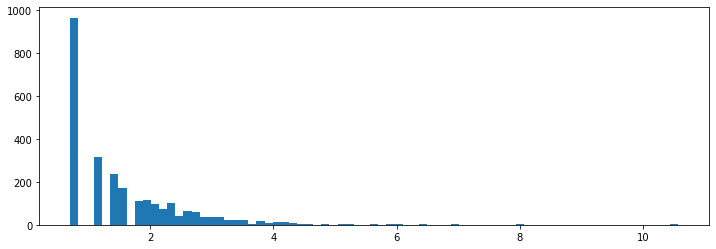

In [6]:
import matplotlib.pyplot as plt
import numpy as np

total_file_observations = [np.log1p(commit_stats['totalFiles']) for commit_stats in all_stats]
plt.figure(figsize=(12, 4))
plt.hist(total_file_observations, 75)
plt.show()

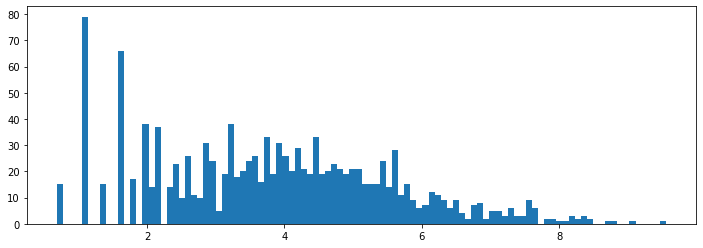

In [7]:
rust_commits = [commit for commit in all_stats if commit['rustLines'] > 0]

total_rust_lines = [
    np.log1p(commit_stats['rustLines']) 
    for commit_stats 
     in rust_commits 
]

plt.figure(figsize=(12, 4))
plt.hist(total_rust_lines, 100)

plt.show()

In [8]:
from IPython.display import display, Markdown, Latex
def printHistAndScatterPlot( dataset_id, suffix, description ):
    histogram_data_set = [
        np.log1p(commit_stats[dataset_id+suffix])
        for commit_stats 
        in all_stats if commit_stats[dataset_id+suffix] > 0
    ]
    scatter_data_set = [
        np.log1p(commit_stats[dataset_id+suffix])
        for commit_stats
         in all_stats
    ]
    display(Markdown('# Analysis of '+dataset_id+' ('+suffix+')\n'+description))
    display(Markdown('### '+dataset_id+' histogram'))
    plt.figure(figsize=(8, 8))
    plt.hist(histogram_data_set, 100)
    plt.show()
    display(Markdown('### '+dataset_id+' vs totalFiles scatter plot'))
    plt.figure(figsize=(8,8))
    plt.scatter(scatter_data_set,total_file_observations)
    plt.show()


## Histogram and ScatterPlot Analysis
#### Many modern projects start out with a bulk check-in of multiple artifacts that were originally part of a cloneable template that does not directly reflect a developer's original code or skill set.
#### Our objective is to divide commits into different categories using the total number of files checked in as one axis and the number of lines of various file types as the other axis.

# Analysis of rust (Lines)
Rust shows a Gaussian distribution in the histogram.
The scatter plot graph shows positive correlation between the number of files checked in and the number of lines of Rust code.

### rust histogram

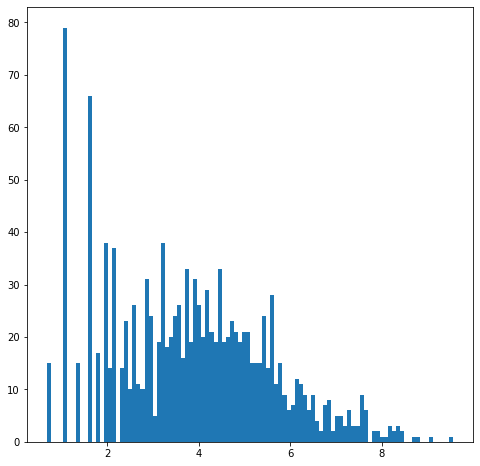

### rust vs totalFiles scatter plot

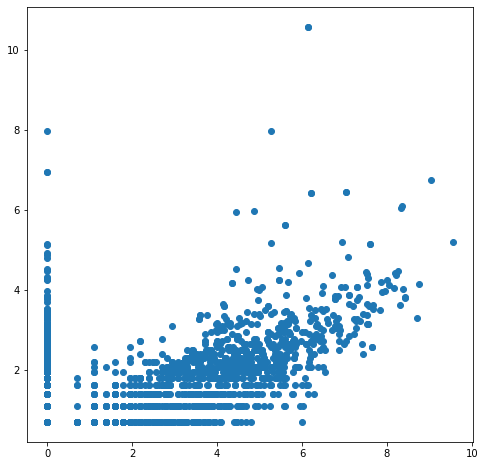

# Analysis of json (Lines)

For JSON we see clusters of datapoints on both histogram and scatter plot, divided by the number of lines in each file.

While not strongly influenced by the number of JSON files, we think that the separation of the clusters is caused by variations in the usage of JSON.

JSON can be used for simple configuration files or significantly larger project resource/library interdependency mapping.


### json histogram

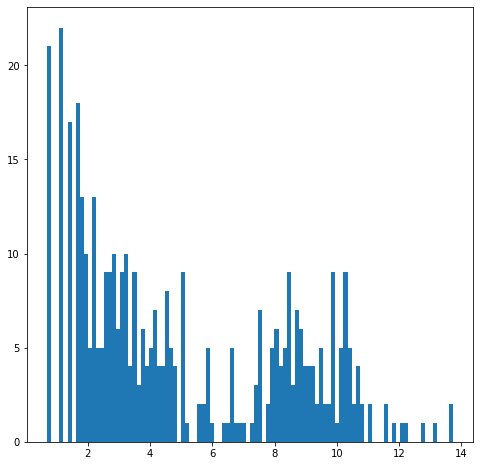

### json vs totalFiles scatter plot

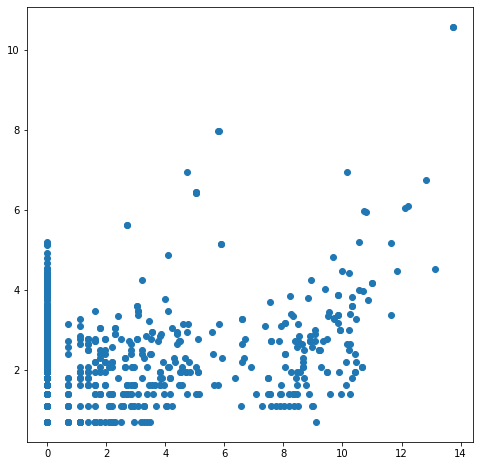

# Analysis of javascript (Lines)

As opposed to JSON, JavaScript stays much closer to zero on both axes.
While JSON is a data formatting protocol, JavaScript is a predominantly human-edited programming language.


### javascript histogram

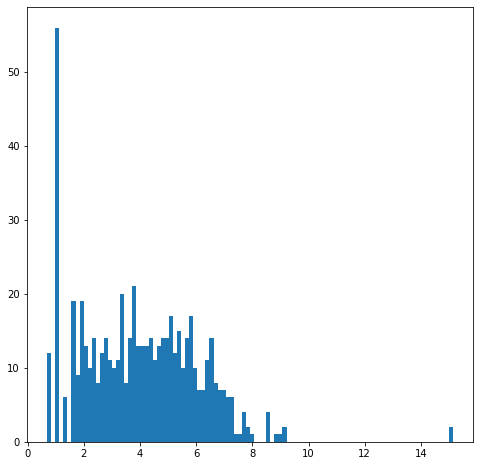

### javascript vs totalFiles scatter plot

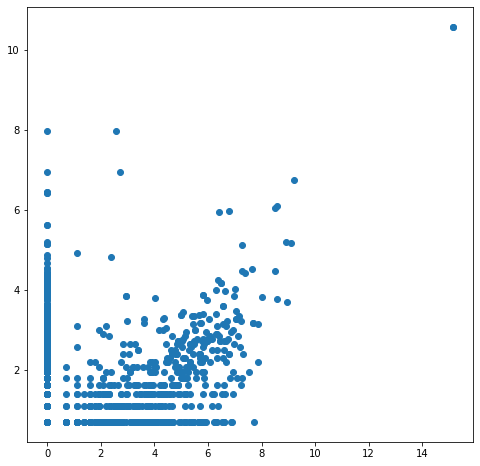

# Analysis of markdown (Lines)

Markdown, on the other hand, is predominantly written by humans for other humans to observe.

Large .md files would most likley be factored out by the TL;DR affect.


### markdown histogram

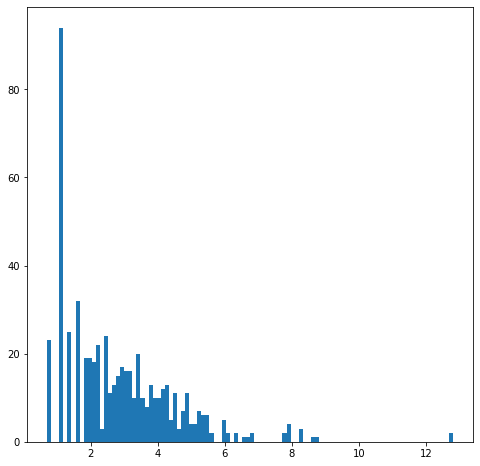

### markdown vs totalFiles scatter plot

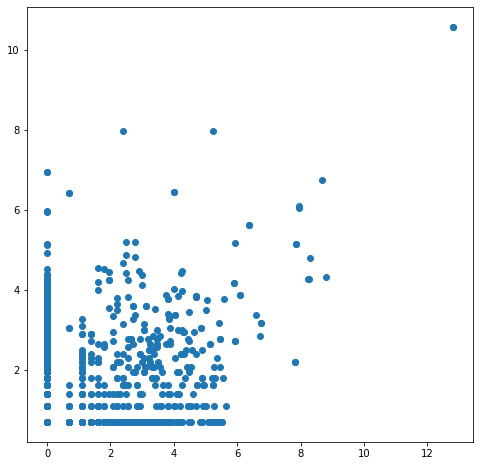

# Analysis of html (Lines)

As the backbone to webpage rendering, HTML comes in many flavors: from human written to a programmatically generated framework.
We do see a stronger influence in number of individual files as the cumulative number of lines increase.  This could be influenced by the increased browser load time on larger files.


### html histogram

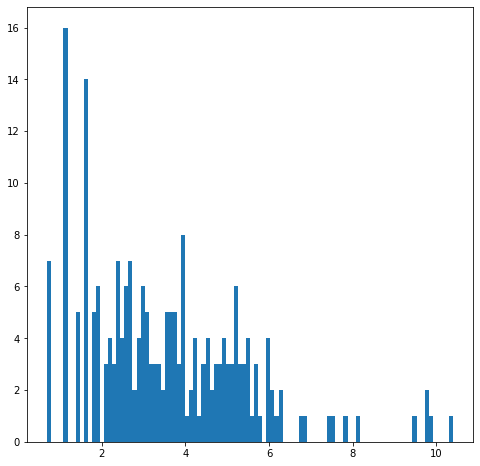

### html vs totalFiles scatter plot

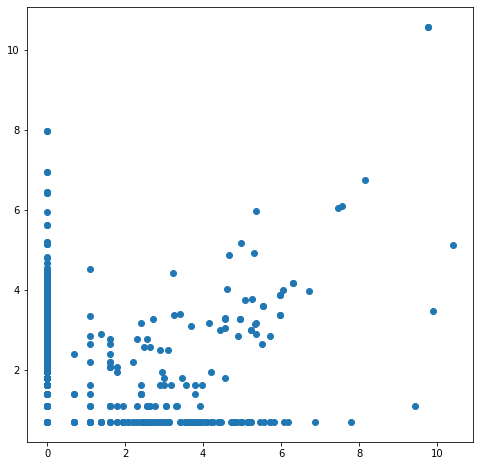

# Analysis of lock (Lines)

Lock those files up


### lock histogram

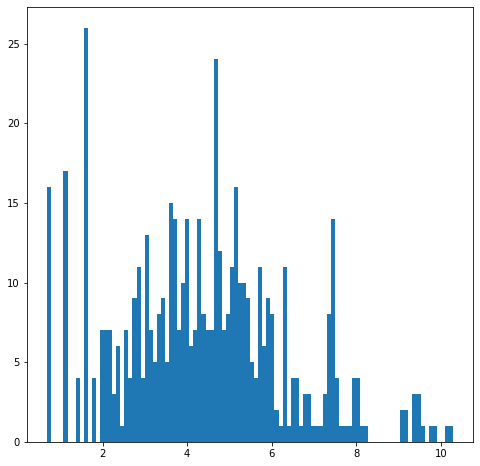

### lock vs totalFiles scatter plot

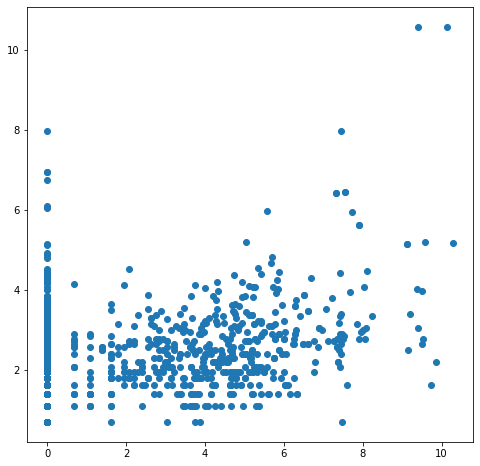

# Analysis of yarn (Lines)
Nobody likes yarn outside of crafters

### yarn histogram

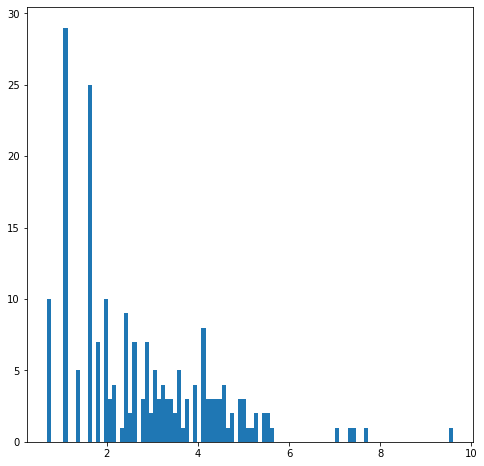

### yarn vs totalFiles scatter plot

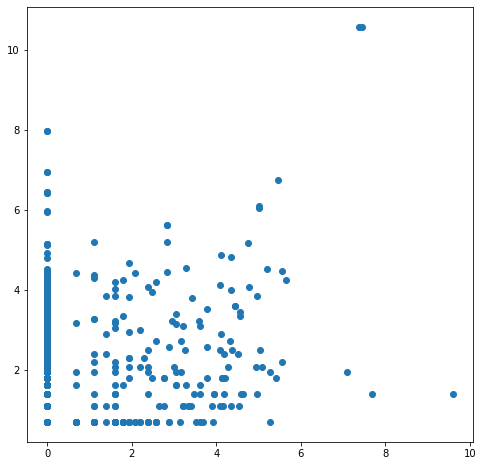

In [15]:
datasetNameAndObservation = json.load(open('./descriptorMap.txt', 'r'))
for dataset_id in datasetNameAndObservation:
    printHistAndScatterPlot(dataset_id, 'Lines', datasetNameAndObservation[dataset_id])